<a href="https://colab.research.google.com/github/v1an1/Remote-sensing-image-classification/blob/master/GodMode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mount your drive containing 'src.zip'

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Unzip the folder

In [0]:
!unzip '/content/drive/My Drive/src.zip'

Copy the model file in current directory for usage

In [0]:
!cp "/content/src/utils_jnb.py" .

In [2]:
import torch 
import matplotlib.pylab as plt
import numpy as np
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms, models
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torchsummary import summary
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import os
import time
from utils_jnb import *

torch.manual_seed(0)

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [0]:
directory = "/content/src"

In [0]:
num_classes = 3

vgg19 = models.vgg19_bn(pretrained=True)
# Freeze model parameters
# Same for all
for param in vgg19.parameters():
    param.requires_grad = False

vgg19.classifier = nn.Sequential(nn.Linear(25088, 4096),
nn.ReLU(),
nn.Dropout(0.4),
nn.Linear(4096, 1024),
nn.ReLU(),
nn.Dropout(0.4),
nn.Linear(1024, num_classes),
nn.LogSoftmax(dim=1))

In [0]:
# Define Optimizer and Loss Function
lossFunc = nn.CrossEntropyLoss()
optimizer = optim.Adam(vgg19.parameters(), lr=1e-2)

# Decay LR by a factor of 0.1 every 7 epochs
expLrScheduler = lr_scheduler.StepLR(optimizer, step_size=6, gamma=0.1)

vgg19.to(device)

In [0]:
summary(vgg19, input_size=(3, 224, 224), batch_size=32)

In [8]:
history = trainValid(vgg19, lossFunc, optimizer, epochs=2)

Epoch: 1/2
Batch number: 000, Training: Loss: 1.1047, Accuracy: 0.2500
Batch number: 001, Training: Loss: 707.6970, Accuracy: 0.3750
Batch number: 002, Training: Loss: 358.7710, Accuracy: 0.3750
Batch number: 003, Training: Loss: 299.7534, Accuracy: 0.3125
Batch number: 004, Training: Loss: 38.7415, Accuracy: 0.6250
Batch number: 005, Training: Loss: 57.8354, Accuracy: 0.6250
Batch number: 006, Training: Loss: 28.4534, Accuracy: 0.6250
Batch number: 007, Training: Loss: 51.6681, Accuracy: 0.2812
Batch number: 008, Training: Loss: 6.0232, Accuracy: 0.8125
Batch number: 009, Training: Loss: 6.4400, Accuracy: 0.5938
Batch number: 010, Training: Loss: 3.1276, Accuracy: 0.5938
Batch number: 011, Training: Loss: 8.1860, Accuracy: 0.6250
Batch number: 012, Training: Loss: 5.8234, Accuracy: 0.6250
Batch number: 013, Training: Loss: 3.7581, Accuracy: 0.6250
Batch number: 014, Training: Loss: 7.5087, Accuracy: 0.5938
Batch number: 015, Training: Loss: 2.1335, Accuracy: 0.7812
Batch number: 016, 

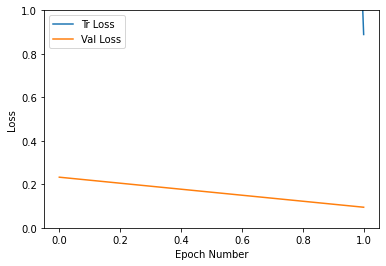

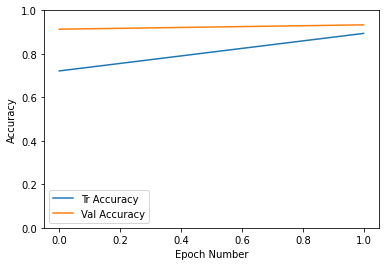

In [14]:
plotCost(history)

Select the best model (i.e. the weights file saved on the max epoch) to test.

In [0]:
saved_model = torch.load('src_model_1.pt')

In [13]:
computeTestSetAccuracy(saved_model, lossFunc)

Test Batch number: 000, Test: Loss: 0.0002, Accuracy: 1.0000
Test Batch number: 001, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 002, Test: Loss: 0.0155, Accuracy: 1.0000
Test Batch number: 003, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 004, Test: Loss: 0.0035, Accuracy: 1.0000
Test Batch number: 005, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 006, Test: Loss: 0.2503, Accuracy: 1.0000
Test Batch number: 007, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 008, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 009, Test: Loss: 0.0569, Accuracy: 1.0000
Test Batch number: 010, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 011, Test: Loss: 0.0013, Accuracy: 1.0000
Test Batch number: 012, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 013, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 014, Test: Loss: 0.5569, Accuracy: 1.0000
Test Batch number: 015, Test: Loss: 0.0000, Accuracy: 1.0000
Test Batch number: 016, 